In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Загрузите данные по вариантам в ноутбук.
df = pd.read_excel("data/Вариант 2.xlsx", header=2, usecols=lambda x: (x != "№" and x != "Устная часть"))
df.head(5)

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Первичный балл,Балл,Минимальный балл
0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1.0,5.0,27.0
1,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1.0,5.0,27.0
2,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1.0,5.0,27.0
3,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1.0,5.0,27.0
4,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1.0,5.0,27.0


In [77]:
# Сделайте описательную статистику полученных данных.
MIN_POINTS = 27
DETAILED_ANSWERS_TASKS_POINTS = [2, 2, 2, 3, 3, 4, 4]

df = df.iloc[:,:-1]
df = df.iloc[:-1, :]
df['№ школы'] = df['№ школы'].astype(int)
df['Номер варианта'] = df['Номер варианта'].astype(int)
df['Задания с развёрнутым ответом'] = df['Задания с развёрнутым ответом'].str.replace(r'\(\d\)', '', regex=True)
df['Первичный балл'] = df['Первичный балл'].astype(int)
df['Балл'] = df['Балл'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   № школы                        2356 non-null   int64 
 1   Класс                          2356 non-null   object
 2   Пол                            2356 non-null   object
 3   Номер варианта                 2356 non-null   int64 
 4   Задания с кратким ответом      2356 non-null   object
 5   Задания с развёрнутым ответом  2356 non-null   object
 6   Первичный балл                 2356 non-null   int64 
 7   Балл                           2356 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 147.4+ KB


In [78]:
df.tail(5)

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Первичный балл,Балл
2351,136,11,М,337,++++++++++++,2223301,25,92
2352,136,11,М,341,++-+++++++++,2212241,25,92
2353,136,11,М,341,++++++++++++,2121342,27,96
2354,136,11,М,343,++++++++++++,2220342,27,96
2355,136,11,Ж,337,++++++++++++,2220342,27,96


In [79]:
# Найдите процент учащихся, выполнивших работу ниже среднего.
mean_score = df['Балл'].mean()

total_students = len(df)
below_average_count = (df['Балл'] < mean_score).sum()

print(f"Процент учащихся, выполнивших работу ниже среднего: {((below_average_count / total_students) * 100):.2f}%")

Процент учащихся, выполнивших работу ниже среднего: 48.01%


In [80]:
#Найти процент учащихся не сдавших экзамен.
failed_count = (df['Балл'] < MIN_POINTS).sum()

print(f"Процент учащихся, не сдавших: {((failed_count / total_students) * 100):.2f}%")

Процент учащихся, не сдавших: 9.21%


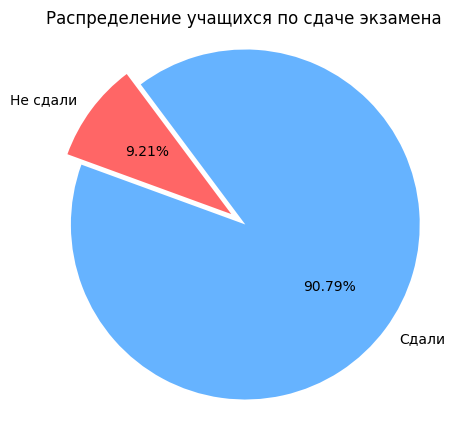

In [81]:
# Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.
passed_count = len(df) - failed_count

labels = ['Сдали', 'Не сдали']
sizes = [passed_count, failed_count]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.2f%%', startangle=160)
plt.title('Распределение учащихся по сдаче экзамена')
plt.axis('equal')  # Обеспечивает круглый вид
plt.show()

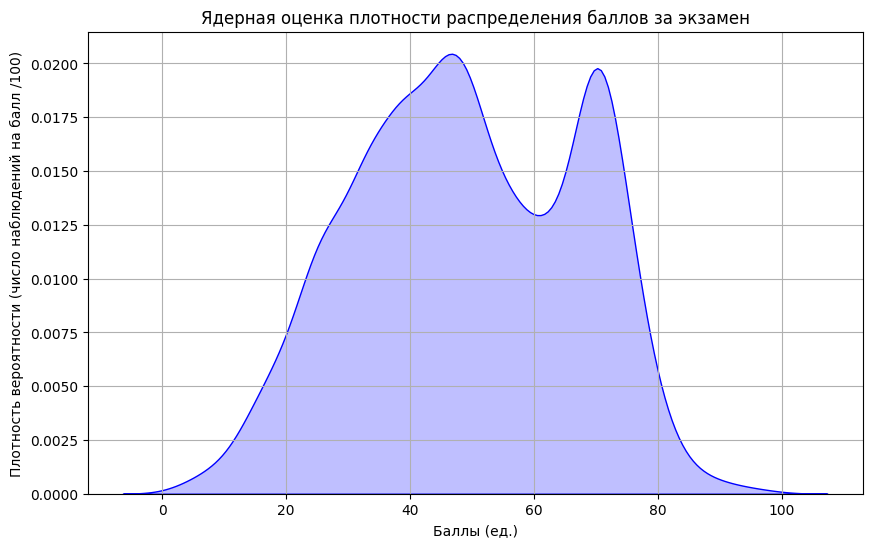

In [82]:
# Построение графика ядерной оценки плотности распределения баллов
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Балл'], fill=True, color='blue')
plt.title('Ядерная оценка плотности распределения баллов за экзамен')
plt.xlabel('Баллы (ед.)')
plt.ylabel('Плотность вероятности (число наблюдений на балл /100)')
plt.grid(True)
plt.show()

In [83]:
# Какое процентное соотношение юношей и девушек писало данный экзамен?
man_count = (df['Пол'] == 'М').sum()
woman_count = (df['Пол'] == 'Ж').sum()

print(f"Процент юношей: {((man_count / total_students) * 100):.2f}%")
print(f"Процент девушек: {((woman_count / total_students) * 100):.2f}%")

Процент юношей: 47.16%
Процент девушек: 52.84%


In [84]:
#Сколько школ принимало участие в экзамене?
print(f"Школ принимали участие: {df["№ школы"].nunique()}")

Школ принимали участие: 17


In [85]:
# Сколько всего заданий с кратким ответом? С развернутым ответом?
print(f"Заданий с кратким ответом: {len(df["Задания с кратким ответом"][0])}")
print(f"Заданий с развернутым ответом: {len(df["Задания с развёрнутым ответом"][0])}")

Заданий с кратким ответом: 12
Заданий с развернутым ответом: 7


In [86]:
# Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: $В_1$, ... $В_к$
# Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.
tasks_succeded = [0 for _ in range(len(df["Задания с кратким ответом"][0]))]
tasks_failed = tasks_succeded.copy()

for row in df["Задания с кратким ответом"]:
    for task_num in range(len(row)):
        if row[task_num] == '+':
            tasks_succeded[task_num] += 1
        else:
            tasks_failed[task_num] += 1

for task_num in range(len(tasks_succeded)):
    print(f"Процент успешного выполнения задания {task_num + 1}: {(tasks_succeded[task_num] / total_students * 100):.2f}%")
    print(f"Процент неуспешного выполнения задания {task_num + 1}: {(tasks_failed[task_num] / total_students * 100):.2f}%")

Процент успешного выполнения задания 1: 89.26%
Процент неуспешного выполнения задания 1: 10.74%
Процент успешного выполнения задания 2: 95.33%
Процент неуспешного выполнения задания 2: 4.67%
Процент успешного выполнения задания 3: 92.78%
Процент неуспешного выполнения задания 3: 7.22%
Процент успешного выполнения задания 4: 91.00%
Процент неуспешного выполнения задания 4: 9.00%
Процент успешного выполнения задания 5: 88.50%
Процент неуспешного выполнения задания 5: 11.50%
Процент успешного выполнения задания 6: 73.17%
Процент неуспешного выполнения задания 6: 26.83%
Процент успешного выполнения задания 7: 37.48%
Процент неуспешного выполнения задания 7: 62.52%
Процент успешного выполнения задания 8: 47.84%
Процент неуспешного выполнения задания 8: 52.16%
Процент успешного выполнения задания 9: 91.85%
Процент неуспешного выполнения задания 9: 8.15%
Процент успешного выполнения задания 10: 71.48%
Процент неуспешного выполнения задания 10: 28.52%
Процент успешного выполнения задания 11: 5

In [87]:
# Аналогично и с типом С (ответы с развернутым ответом)
tasks_succeded = [0 for _ in range(len(df["Задания с развёрнутым ответом"][0]))]
tasks_failed = tasks_succeded.copy()

for row in df["Задания с развёрнутым ответом"]:
    for task_num in range(len(row)):
        if int(row[task_num]) == DETAILED_ANSWERS_TASKS_POINTS[task_num]:
            tasks_succeded[task_num] += 1
        elif int(row[task_num]) == 0:
            tasks_failed[task_num] += 1

for task_num in range(len(tasks_succeded)):
    print(f"Процент успешного выполнения задания {task_num + 1}: {(tasks_succeded[task_num] / total_students * 100):.2f}%")
    print(f"Процент неуспешного выполнения задания {task_num + 1}: {(tasks_failed[task_num] / total_students * 100):.2f}%")

Процент успешного выполнения задания 1: 26.15%
Процент неуспешного выполнения задания 1: 66.09%
Процент успешного выполнения задания 2: 7.47%
Процент неуспешного выполнения задания 2: 84.13%
Процент успешного выполнения задания 3: 12.56%
Процент неуспешного выполнения задания 3: 84.42%
Процент успешного выполнения задания 4: 0.51%
Процент неуспешного выполнения задания 4: 97.28%
Процент успешного выполнения задания 5: 1.10%
Процент неуспешного выполнения задания 5: 96.60%
Процент успешного выполнения задания 6: 0.38%
Процент неуспешного выполнения задания 6: 98.90%
Процент успешного выполнения задания 7: 0.04%
Процент неуспешного выполнения задания 7: 96.60%


In [89]:
# Сделайте анализ по двум школам:
#    1. по всем выполненным заданиям типа В
#    2. по заданиям типа С больше 50%
#    3. по среднему баллу юношей и девушек

schools = [133, 136]

success_b_tasks = [0, 0]
success_c_tasks = [0, 0]
man_total_score = [0, 0]
man_count = [0, 0]
woman_total_score = [0, 0]
woman_count = [0, 0]

for _, row in df.iterrows():
    if str(schools[0]) in str(row["№ школы"]):
        success_b_tasks[0] += row["Задания с кратким ответом"].count("+")
        for task_num in range(len(row["Задания с развёрнутым ответом"])):
            if int(row["Задания с развёрнутым ответом"][task_num]) >= DETAILED_ANSWERS_TASKS_POINTS[task_num] / 2:
                success_c_tasks[0] += 1
        if row["Пол"] == "М":
            man_count[0] += 1
            man_total_score[0] += row["Балл"]
        else:
            woman_total_score[0] += row["Балл"]
            woman_count[0] += 1
    elif str(schools[1]) in str(row["№ школы"]):
        success_b_tasks[1] += row["Задания с кратким ответом"].count("+")
        for task_num in range(len(row["Задания с развёрнутым ответом"])):
            if int(row["Задания с развёрнутым ответом"][task_num]) >= DETAILED_ANSWERS_TASKS_POINTS[task_num] / 2:
                success_c_tasks[1] += 1
        if row["Пол"] == "М":
            man_count[1] += 1
            man_total_score[1] += row["Балл"]
        else:
            woman_count[1] += 1
            woman_total_score[1] += row["Балл"]
man_mean_score = [man_total_score[0] / man_count[0], man_total_score[1] / man_count[1]]
woman_mean_score = [woman_total_score[0] / woman_count[0], woman_total_score[1] / woman_count[1]]

print(f"Школа {schools[0]}, школа {schools[1]}")
print(f"Успешно выполненные задания B: {success_b_tasks}")
print(f"Успешно выполненные задания C (более 50%): {success_c_tasks}")
print(f"Средний балл юношей: {np.round(man_mean_score, 2)}")
print(f"Средний балл девушек: {np.round(woman_mean_score, 2)}")

Школа 133, школа 136
Успешно выполненные задания B: [1039, 9196]
Успешно выполненные задания C (более 50%): [70, 908]
Средний балл юношей: [49.66 52.4 ]
Средний балл девушек: [48.78 50.98]
